In [1]:
import torch
import numpy as np
from dataloader import create_data_loaders
from pca import plot_scree, analyze_with_pca
from lda import analyze_with_lda
from KNN_classifier import knn_comparison
import os
import pandas as pd


In [2]:
#GPU is love GPU is life

# Clear any existing CUDA settings
if 'PYTORCH_CUDA_ALLOC_CONF' in os.environ:
    del os.environ['PYTORCH_CUDA_ALLOC_CONF']

# Initialize CUDA with default settings
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device == 'cuda':
    torch.cuda.init()
    torch.cuda.empty_cache()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


In [3]:
# Optional: Create DataLoaders if needed for batch processing
loaders = create_data_loaders(batch_size=1000, device=device)

# Clear GPU memory if needed
torch.cuda.empty_cache()

Loading mnist dataset...
Normalizing and centering data...
Loaded 60000 samples
Data shape: torch.Size([60000, 784])
Mean: -0.0000, Std: 0.9563
Loading fashion_mnist dataset...
Normalizing and centering data...
Loaded 60000 samples
Data shape: torch.Size([60000, 784])
Mean: -0.0000, Std: 1.0000
Files already downloaded and verified
Loading cifar dataset...
Normalizing and centering data...
Loaded 50000 samples
Data shape: torch.Size([50000, 3072])
Mean: 0.0000, Std: 1.0000

Dataset Statistics:

mnist:
Overall Mean: -0.0000
Overall Std: 0.9563
Min Value: -1.2742
Max Value: 244.9449

fashion_mnist:
Overall Mean: -0.0000
Overall Std: 1.0000
Min Value: -2.4100
Max Value: 185.4760

cifar:
Overall Mean: 0.0000
Overall Std: 1.0000
Min Value: -2.2074
Max Value: 2.6250



Analyzing MNIST...
Computing covariance matrix...
Computing eigendecomposition...


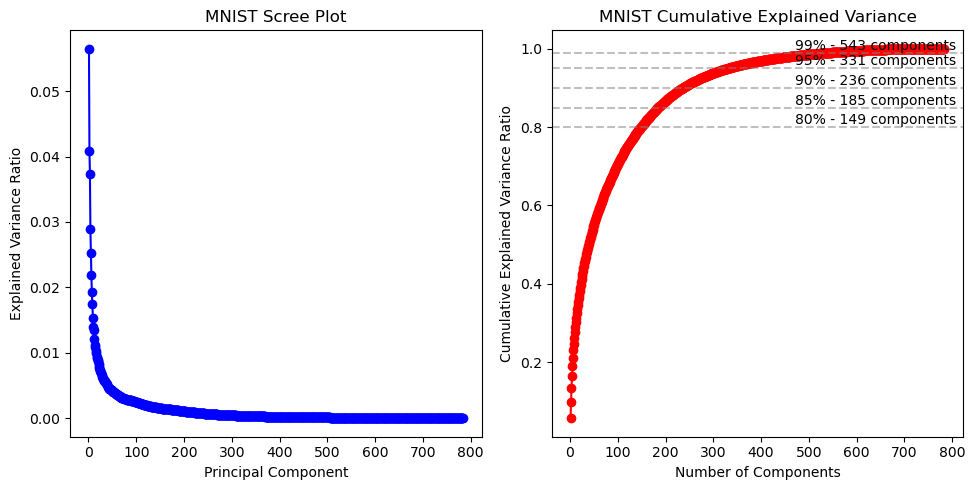

In [4]:
# Process MNIST
print("\nAnalyzing MNIST...")
mnist_var_exp, mnist_k_values, mnist_eigenvecs = plot_scree(
    loaders['mnist'], "MNIST", batch_size=4000, device=device
)
mnist_k = mnist_k_values[0.95]


Analyzing Fashion-MNIST...
Computing covariance matrix...
Computing eigendecomposition...


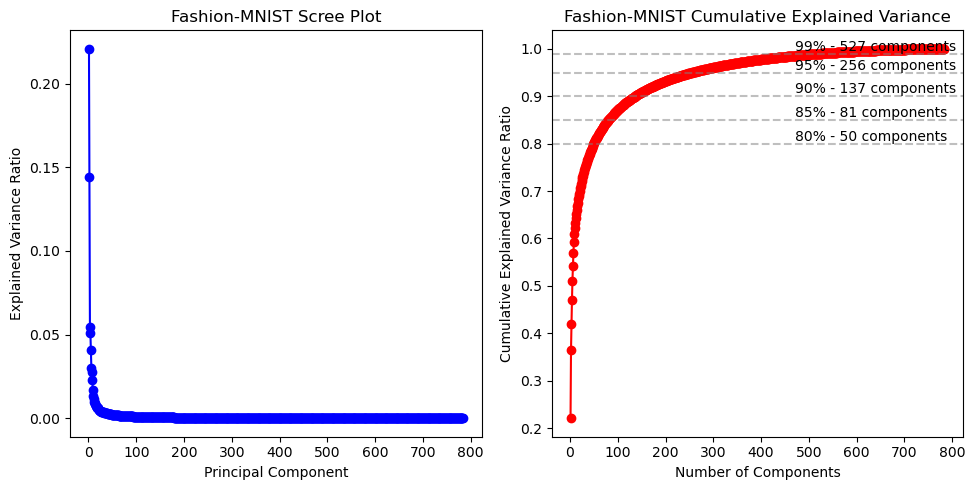

In [5]:
# Process Fashion-MNIST
print("\nAnalyzing Fashion-MNIST...")
fashion_var_exp, fashion_k_values, fashion_eigenvecs = plot_scree(
    loaders['fashion_mnist'], "Fashion-MNIST", batch_size=4000, device=device
)
fashion_k = fashion_k_values[0.95]


Analyzing CIFAR-10...
Computing covariance matrix...
Computing eigendecomposition...


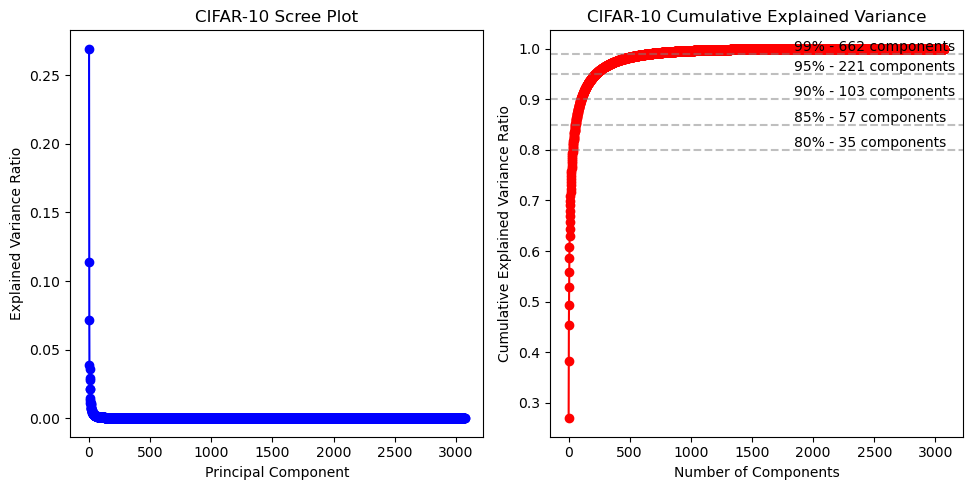

In [6]:
# Process CIFAR-10
print("\nAnalyzing CIFAR-10...")
cifar_var_exp, cifar_k_values, cifar_eigenvecs = plot_scree(
    loaders['cifar'], "CIFAR-10", batch_size=5000, device=device
)
cifar_k = cifar_k_values[0.95]

In [7]:
mnist_data = loaders['mnist'].dataset.data
mnist_labels = loaders['mnist'].dataset.labels
fashion_data = loaders['fashion_mnist'].dataset.data
fashion_labels = loaders['fashion_mnist'].dataset.labels
cifar_data = loaders['cifar'].dataset.data
cifar_labels = loaders['cifar'].dataset.labels

In [8]:
# Perform dimension reduction
print("\nReducing dimensions...")
mnist_reduced = analyze_with_pca(
    loaders['mnist'], "MNIST", k=mnist_k, batch_size=4000, device=device
)

fashion_reduced = analyze_with_pca(
    loaders['fashion_mnist'], "Fashion-MNIST", k=fashion_k, batch_size=4000, device=device
)

cifar_reduced = analyze_with_pca(
    loaders['cifar'], "CIFAR-10", k=cifar_k, batch_size=5000, device=device
)

# Clear GPU memory
torch.cuda.empty_cache()


Reducing dimensions...



Performing KNN classification...

Original Data Metrics:


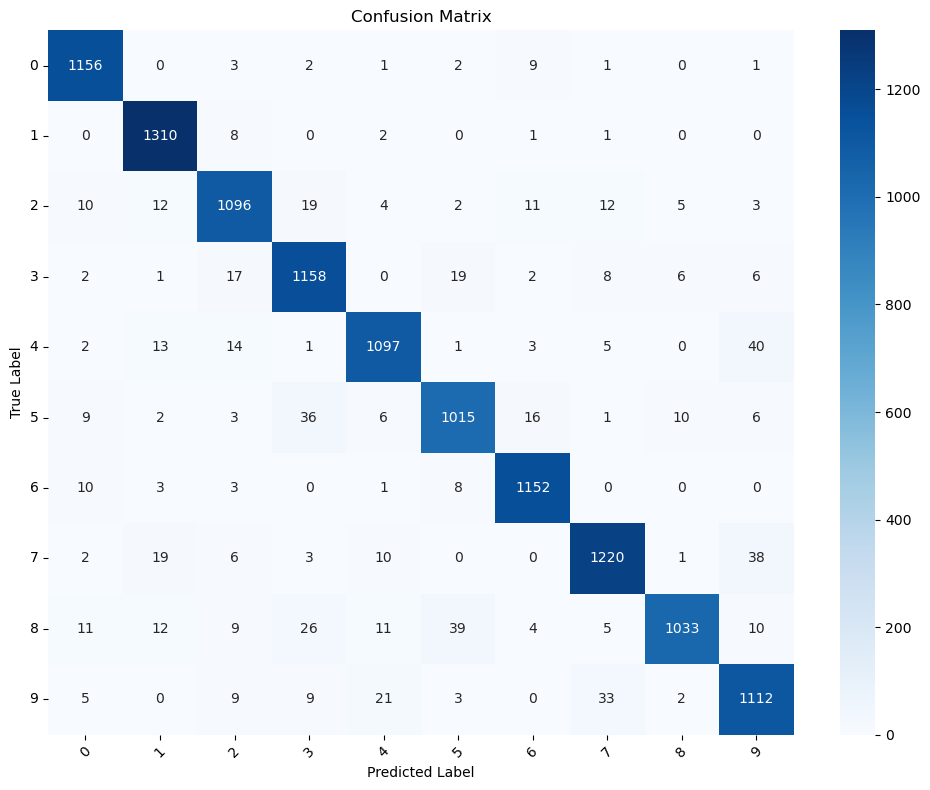

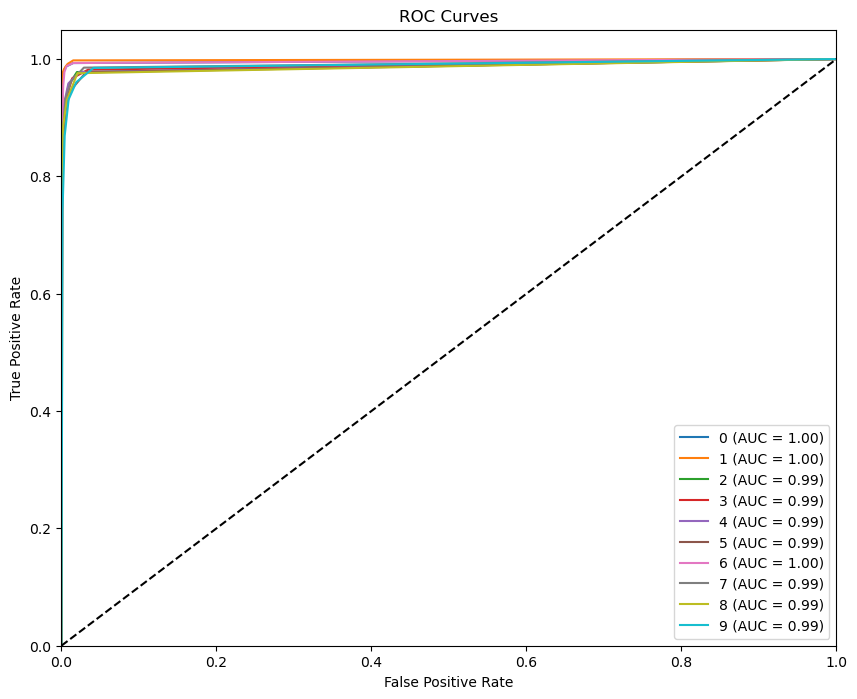


Reduced Data Metrics:


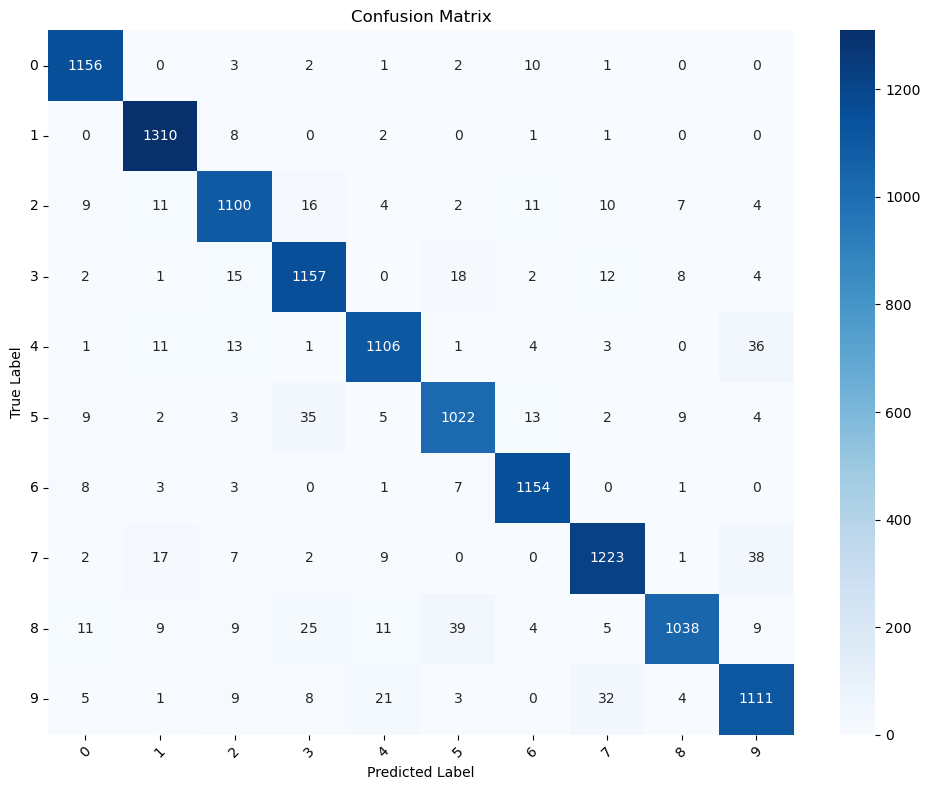

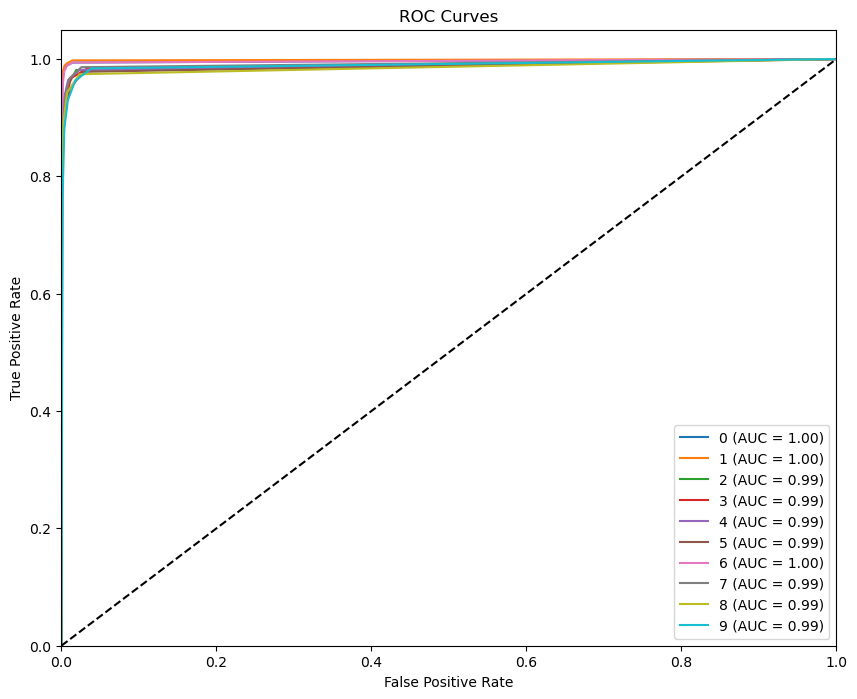


MNIST Results Summary:
Original Data:
Accuracy: 0.9460
Precision: 0.9460
Recall: 0.9457
F1 Score: 0.9456

Reduced Data:
Accuracy: 0.9482
Precision: 0.9482
Recall: 0.9481
F1 Score: 0.9479

Detailed Classification Report for Reduced Data:
              precision    recall  f1-score       support
0              0.960931  0.983830  0.972246   1175.000000
1              0.959707  0.990923  0.975065   1322.000000
2              0.940171  0.936968  0.938567   1174.000000
3              0.928571  0.949139  0.938742   1219.000000
4              0.953448  0.940476  0.946918   1176.000000
5              0.934186  0.925725  0.929936   1104.000000
6              0.962469  0.980459  0.971380   1177.000000
7              0.948798  0.941493  0.945131   1299.000000
8              0.971910  0.894828  0.931777   1160.000000
9              0.921227  0.930486  0.925833   1194.000000
accuracy       0.948083  0.948083  0.948083      0.948083
macro avg      0.948142  0.947433  0.947560  12000.000000
weighted

In [9]:
# Perform KNN classification with comprehensive metrics
print("\nPerforming KNN classification...")
mnist_results = knn_comparison(mnist_data, mnist_reduced, mnist_labels)

# Access different metrics
print("\nMNIST Results Summary:")
print(f"Original Data:")
print(f"Accuracy: {mnist_results['original_metrics']['precision']:.4f}")
print(f"Precision: {mnist_results['original_metrics']['precision']:.4f}")
print(f"Recall: {mnist_results['original_metrics']['recall']:.4f}")
print(f"F1 Score: {mnist_results['original_metrics']['f1_score']:.4f}")

print(f"\nReduced Data:")
print(f"Accuracy: {mnist_results['reduced_metrics']['precision']:.4f}")
print(f"Precision: {mnist_results['reduced_metrics']['precision']:.4f}")
print(f"Recall: {mnist_results['reduced_metrics']['recall']:.4f}")
print(f"F1 Score: {mnist_results['reduced_metrics']['f1_score']:.4f}")

# Print detailed per-class metrics
print("\nDetailed Classification Report for Reduced Data:")
print(pd.DataFrame(mnist_results['reduced_metrics']['class_report']).T)


Performing KNN classification...

Original Data Metrics:


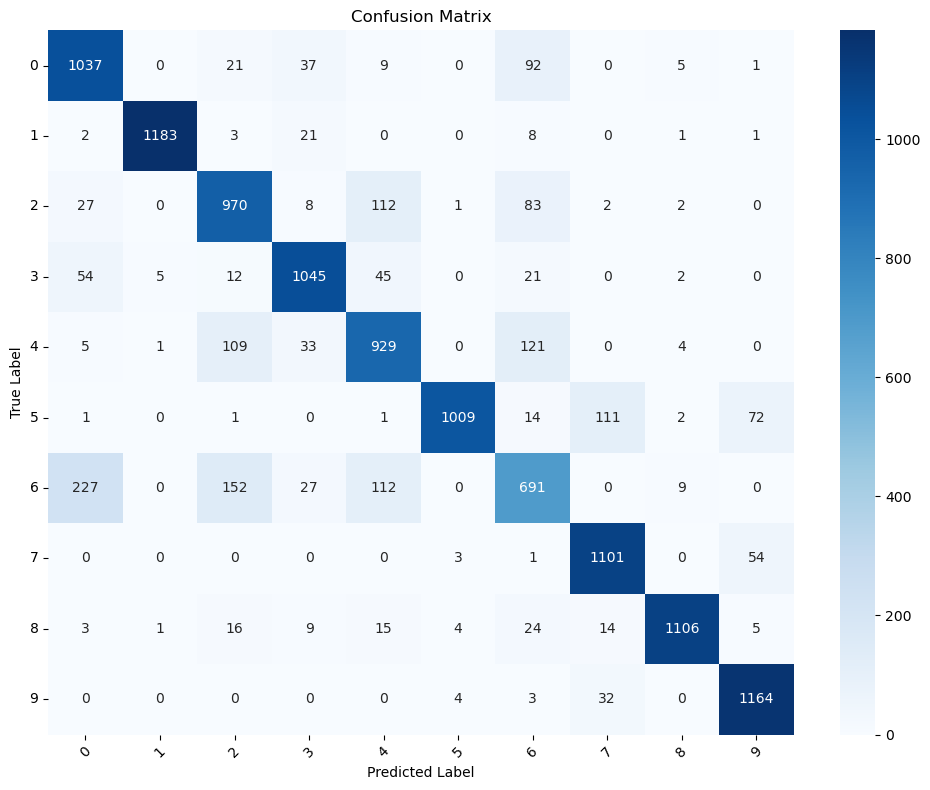

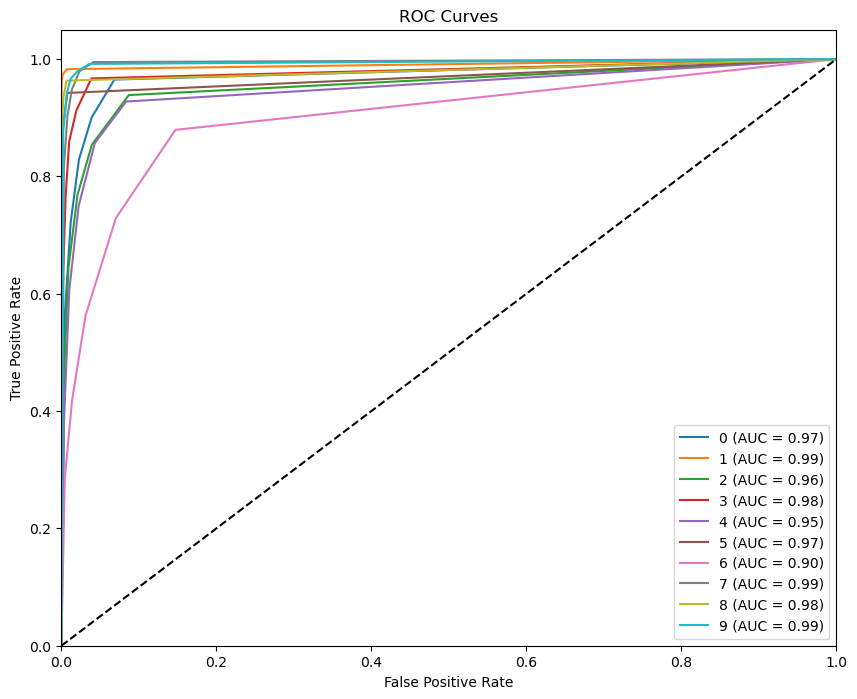


Reduced Data Metrics:


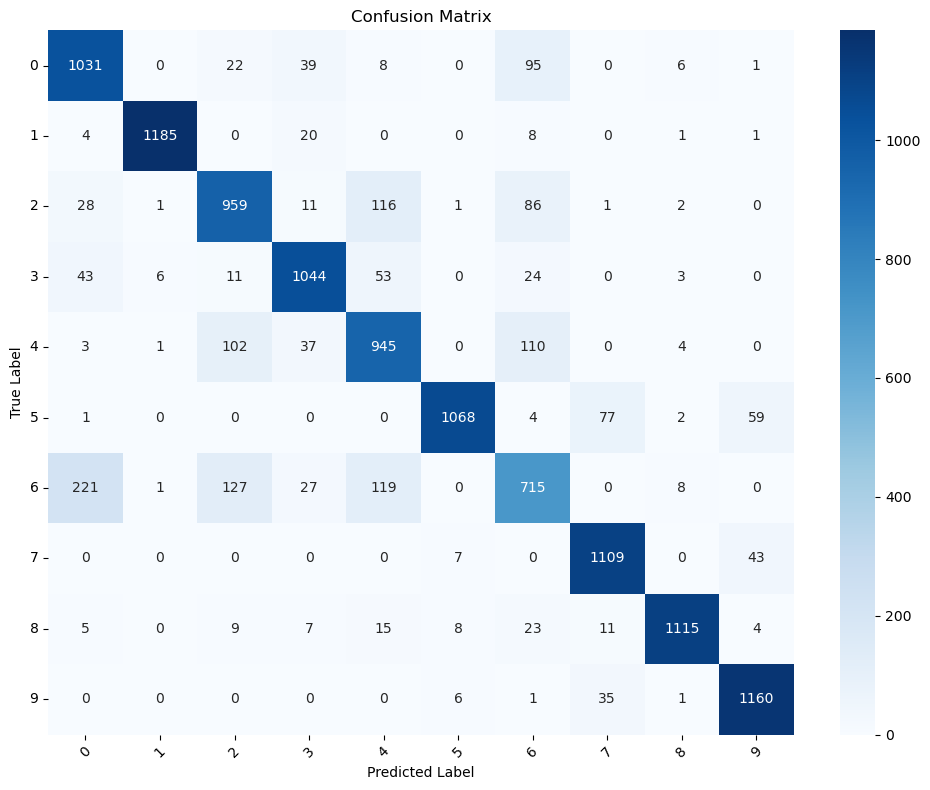

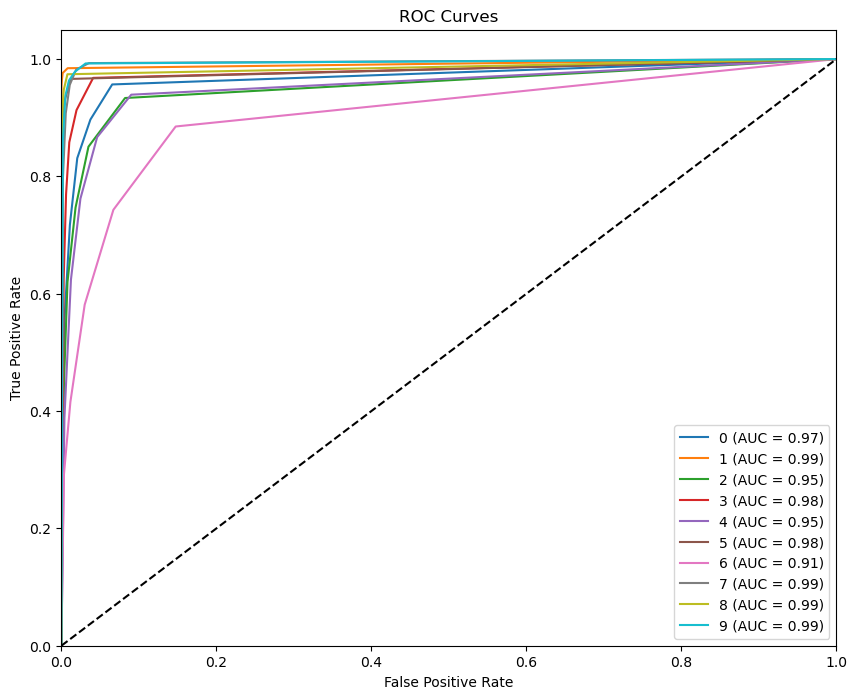

\Fashion-MNIST Results Summary:
Original Data:
Accuracy: 0.8548
Precision: 0.8548
Recall: 0.8529
F1 Score: 0.8522

Reduced Data:
Accuracy: 0.8616
Precision: 0.8616
Recall: 0.8609
F1 Score: 0.8602

Detailed Classification Report for Reduced Data:
              precision    recall  f1-score       support
0              0.771707  0.857737  0.812451   1202.000000
1              0.992462  0.972108  0.982180   1219.000000
2              0.779675  0.795851  0.787680   1205.000000
3              0.881013  0.881757  0.881385   1184.000000
4              0.752389  0.786190  0.768918   1202.000000
5              0.979817  0.881916  0.928292   1211.000000
6              0.670732  0.587028  0.626095   1218.000000
7              0.899432  0.956859  0.927258   1159.000000
8              0.976357  0.931495  0.953399   1197.000000
9              0.914826  0.964256  0.938891   1203.000000
accuracy       0.860917  0.860917  0.860917      0.860917
macro avg      0.861841  0.861520  0.860655  12000.000000


In [10]:
# Perform KNN classification with comprehensive metrics
print("\nPerforming KNN classification...")
fashion_results = knn_comparison(fashion_data, fashion_reduced, fashion_labels)

# Access different metrics
print("\Fashion-MNIST Results Summary:")
print(f"Original Data:")
print(f"Accuracy: {fashion_results['original_metrics']['precision']:.4f}")
print(f"Precision: {fashion_results['original_metrics']['precision']:.4f}")
print(f"Recall: {fashion_results['original_metrics']['recall']:.4f}")
print(f"F1 Score: {fashion_results['original_metrics']['f1_score']:.4f}")

print(f"\nReduced Data:")
print(f"Accuracy: {fashion_results['reduced_metrics']['precision']:.4f}")
print(f"Precision: {fashion_results['reduced_metrics']['precision']:.4f}")
print(f"Recall: {fashion_results['reduced_metrics']['recall']:.4f}")
print(f"F1 Score: {fashion_results['reduced_metrics']['f1_score']:.4f}")

# Print detailed per-class metrics
print("\nDetailed Classification Report for Reduced Data:")
print(pd.DataFrame(fashion_results['reduced_metrics']['class_report']).T)


Performing KNN classification for CIFAR-10...

Original Data Metrics:


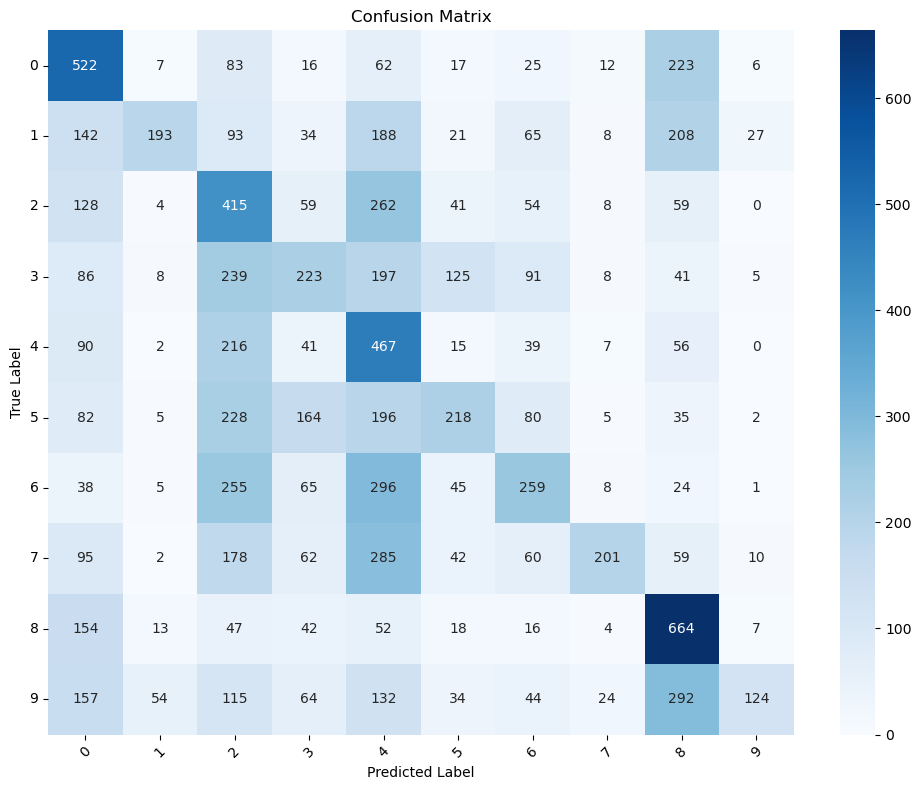

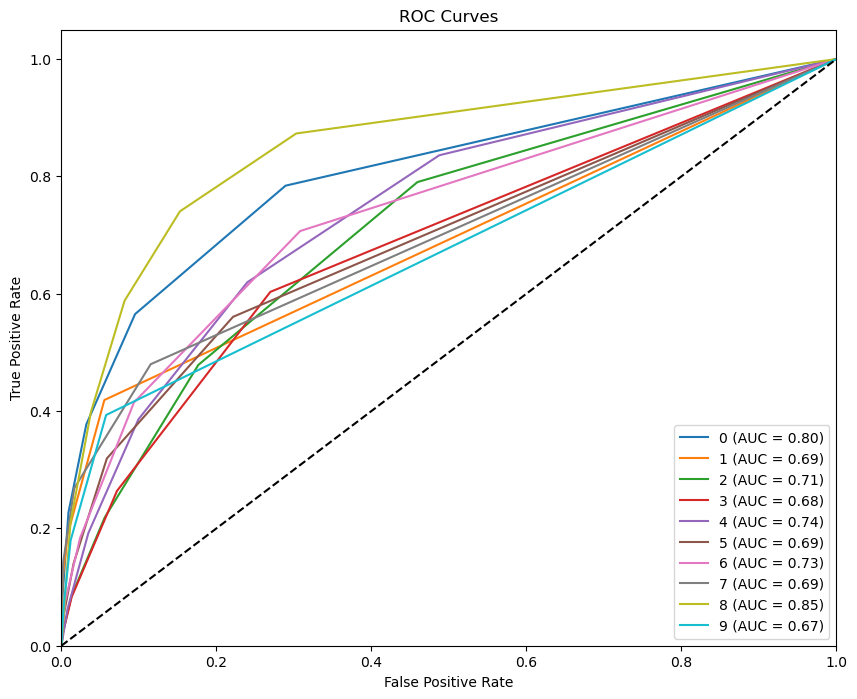


Reduced Data Metrics:


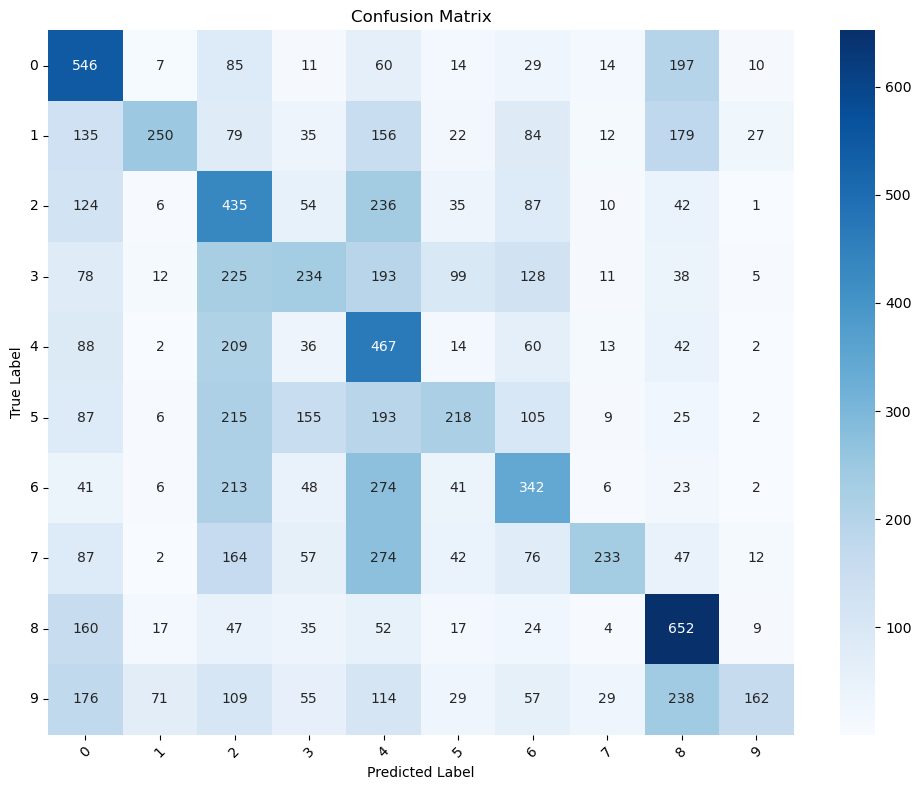

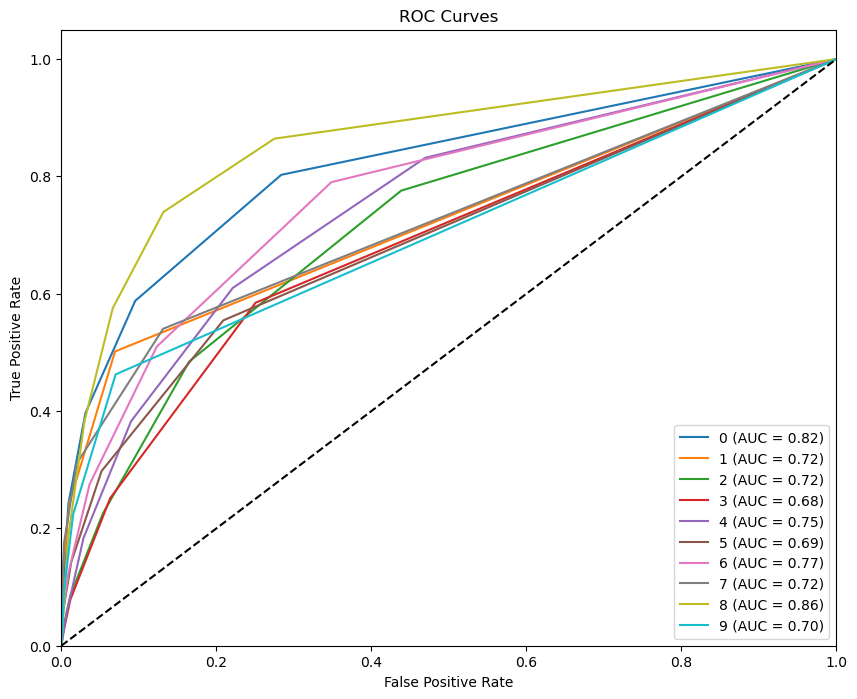


CIFAR-10 Results Summary:

Original Data Metrics:
Accuracy: 0.4266
Precision: 0.4266
Recall: 0.3286
F1 Score: 0.3146

Reduced Data Metrics:
Accuracy: 0.4407
Precision: 0.4407
Recall: 0.3539
F1 Score: 0.3446


In [11]:
# Perform KNN classification with comprehensive metrics for CIFAR-10
print("\nPerforming KNN classification for CIFAR-10...")
cifar_results = knn_comparison(cifar_data, cifar_reduced, cifar_labels)

# Print summary metrics
print("\nCIFAR-10 Results Summary:")
print("\nOriginal Data Metrics:")
print(f"Accuracy: {cifar_results['original_metrics']['precision']:.4f}")
print(f"Precision: {cifar_results['original_metrics']['precision']:.4f}")
print(f"Recall: {cifar_results['original_metrics']['recall']:.4f}")
print(f"F1 Score: {cifar_results['original_metrics']['f1_score']:.4f}")

print("\nReduced Data Metrics:")
print(f"Accuracy: {cifar_results['reduced_metrics']['precision']:.4f}")
print(f"Precision: {cifar_results['reduced_metrics']['precision']:.4f}")
print(f"Recall: {cifar_results['reduced_metrics']['recall']:.4f}")
print(f"F1 Score: {cifar_results['reduced_metrics']['f1_score']:.4f}")

In [12]:
#Perform LDA analysis
print("\nPerforming LDA analysis...")
mnist_lda = analyze_with_lda(mnist_data, mnist_labels, n_components=9, batch_size=4000, device=device)
fashion_lda = analyze_with_lda(fashion_data, fashion_labels, n_components=9, batch_size=4000, device=device)
cifar_lda = analyze_with_lda(cifar_data, cifar_labels, n_components=9, batch_size=5000, device=device)

torch.cuda.empty_cache()


Performing LDA analysis...

Performing LDA reduction to 9 components...

Solving generalized eigenvalue problem...
Adding regularization to within-class scatter matrix...

Projecting data...
Final data shape: (60000, 9)

Performing LDA reduction to 9 components...

Solving generalized eigenvalue problem...

Projecting data...
Final data shape: (60000, 9)

Performing LDA reduction to 9 components...

Solving generalized eigenvalue problem...

Projecting data...
Final data shape: (50000, 9)



Performing KNN classification on LDA results...

Analyzing MNIST LDA Results...

Original Data Metrics:


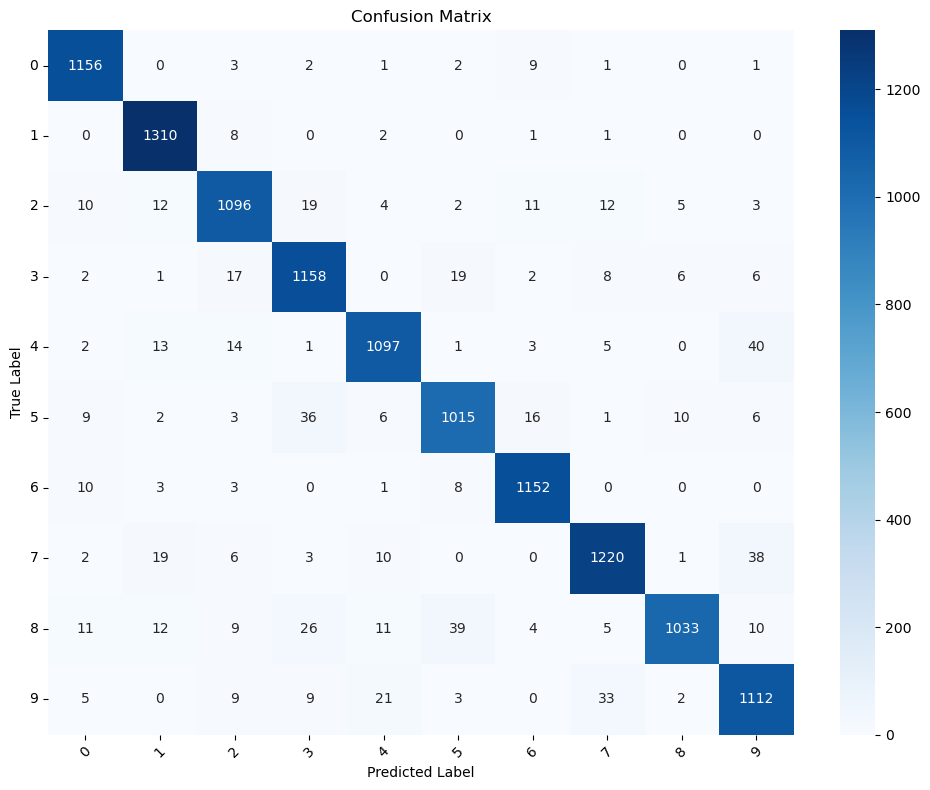

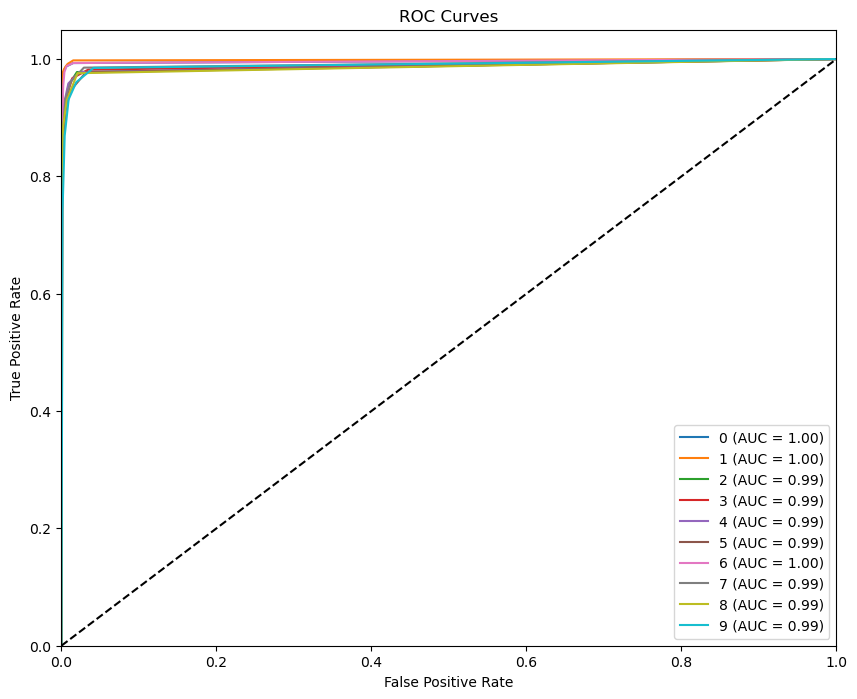


Reduced Data Metrics:


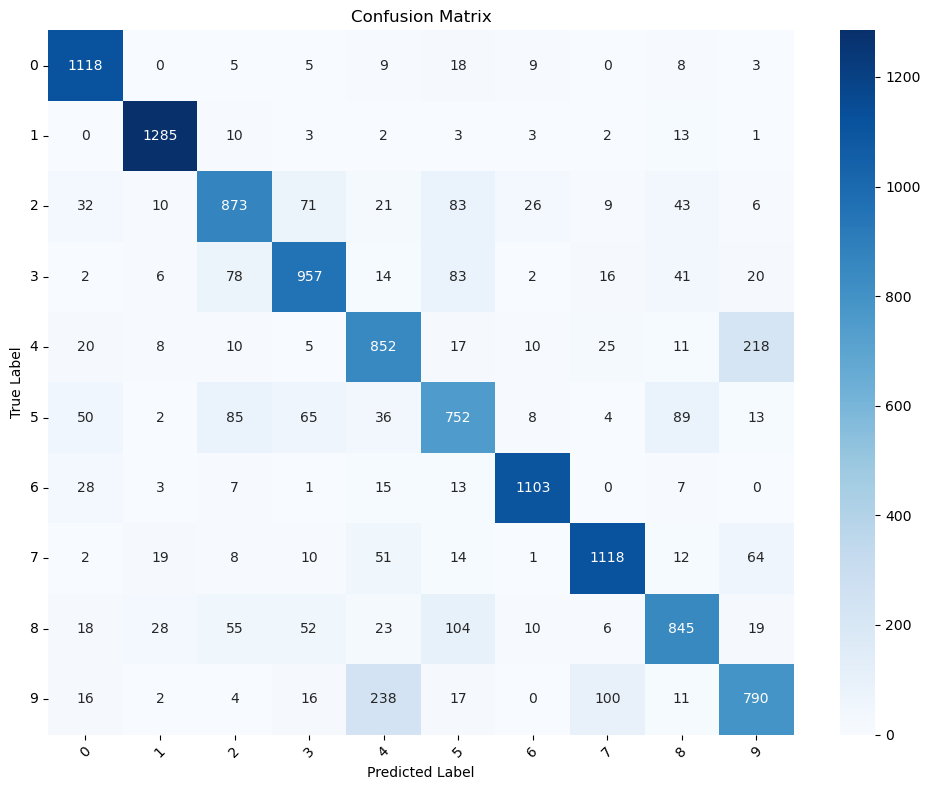

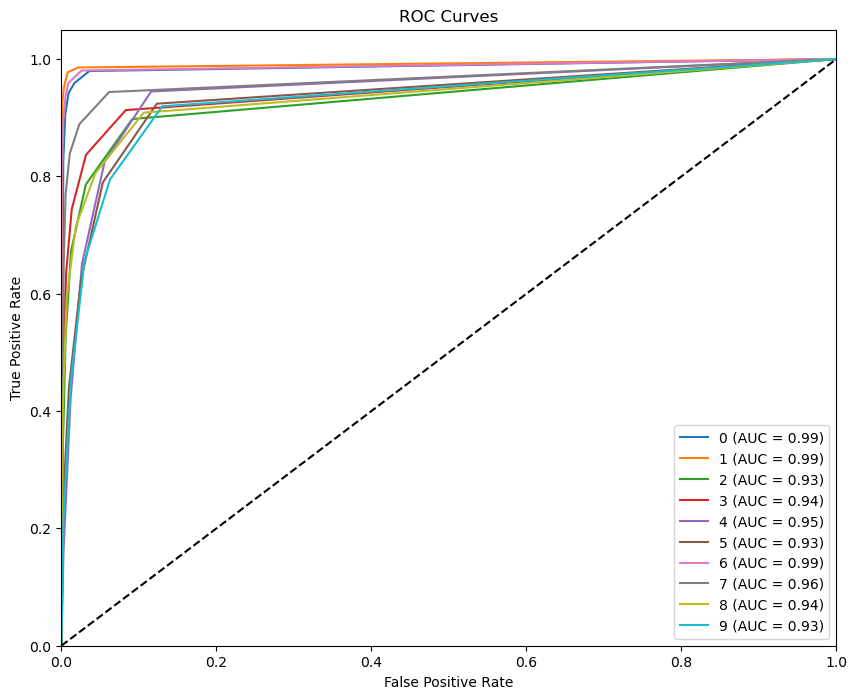


MNIST LDA Results Summary:

Original Data Metrics:
Accuracy: 0.9460
Precision: 0.9460
Recall: 0.9457
F1 Score: 0.9456

LDA-Reduced Data Metrics:
Accuracy: 0.8070
Precision: 0.8070
Recall: 0.8077
F1 Score: 0.8069

Detailed Classification Report for MNIST LDA:
              precision    recall  f1-score      support
0              0.869362  0.951489  0.908574   1175.00000
1              0.942773  0.972012  0.957169   1322.00000
2              0.769163  0.743612  0.756172   1174.00000
3              0.807595  0.785070  0.796173   1219.00000
4              0.675654  0.724490  0.699220   1176.00000
5              0.681159  0.681159  0.681159   1104.00000
6              0.941126  0.937128  0.939123   1177.00000
7              0.873437  0.860662  0.867003   1299.00000
8              0.782407  0.728448  0.754464   1160.00000
9              0.696649  0.661642  0.678694   1194.00000
accuracy       0.807750  0.807750  0.807750      0.80775
macro avg      0.803933  0.804571  0.803775  12000.00000

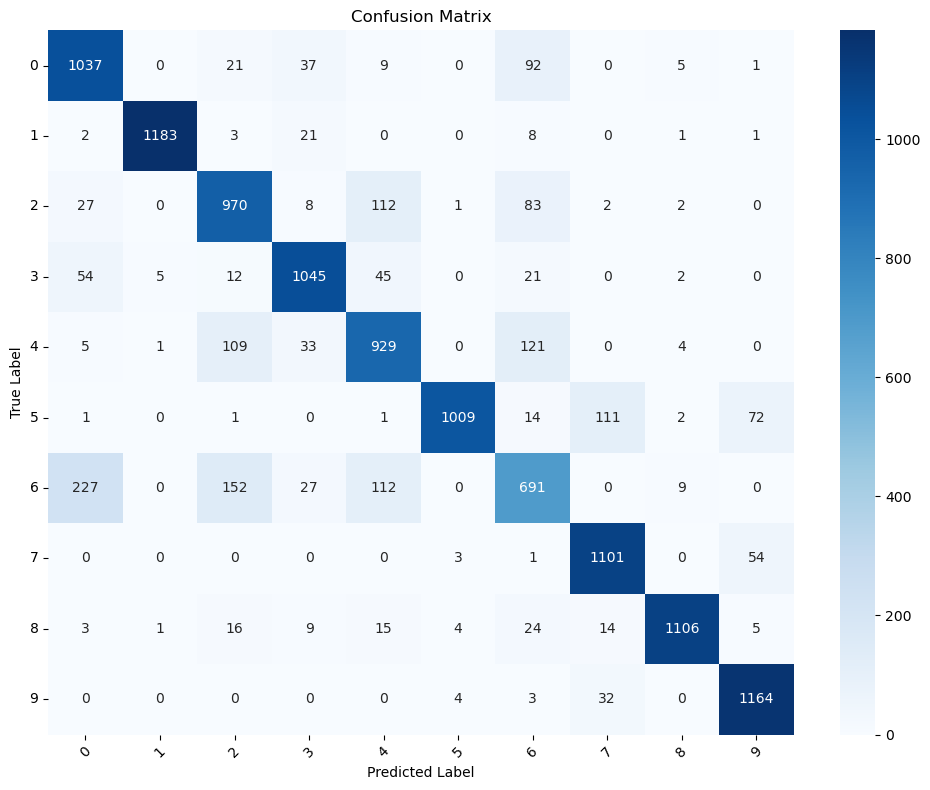

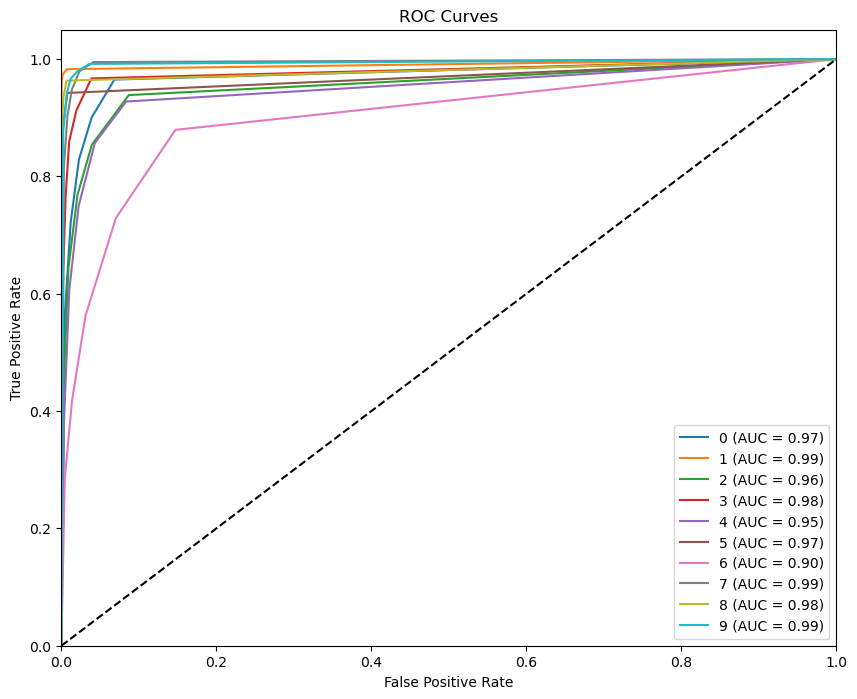


Reduced Data Metrics:


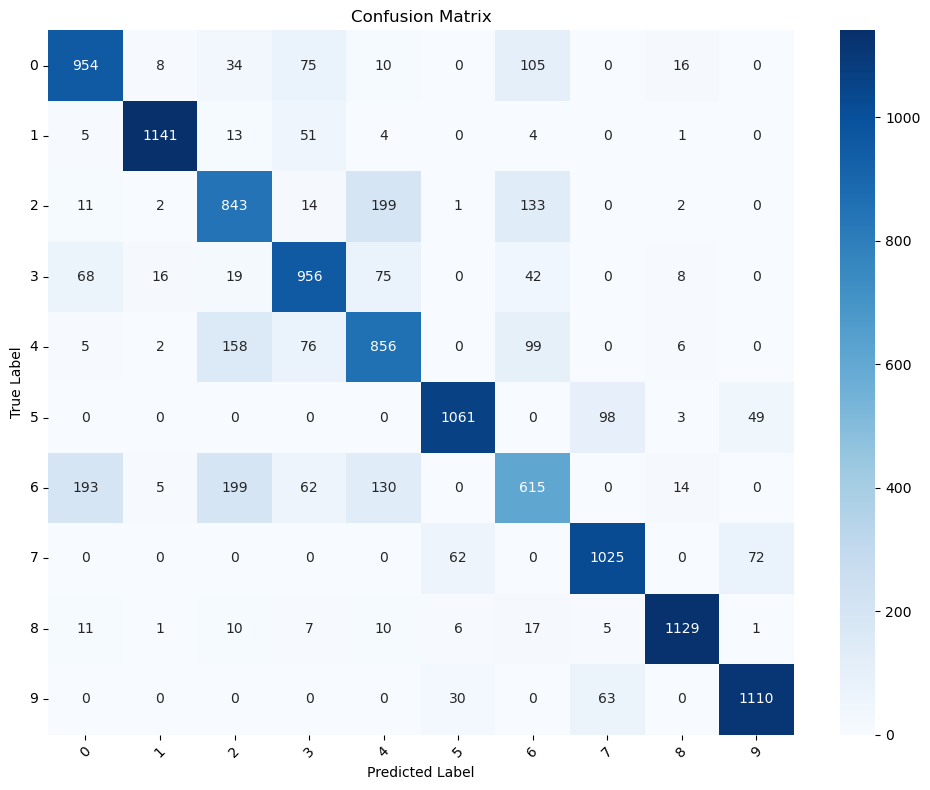

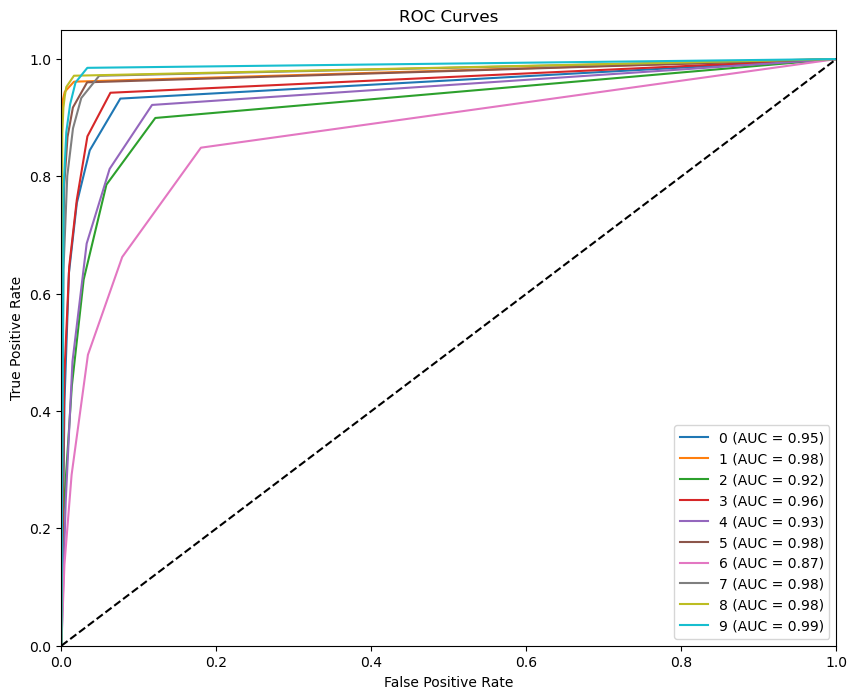


Fashion-MNIST LDA Results Summary:

Original Data Metrics:
Accuracy: 0.8548
Precision: 0.8548
Recall: 0.8529
F1 Score: 0.8522

LDA-Reduced Data Metrics:
Accuracy: 0.8072
Precision: 0.8072
Recall: 0.8075
F1 Score: 0.8066

Detailed Classification Report for Fashion-MNIST LDA:
              precision    recall  f1-score     support
T-shirt/top    0.765036  0.793677  0.779094   1202.0000
Trouser        0.971064  0.936013  0.953216   1219.0000
Pullover       0.660658  0.699585  0.679565   1205.0000
Dress          0.770346  0.807432  0.788454   1184.0000
Coat           0.666667  0.712146  0.688656   1202.0000
Sandal         0.914655  0.876135  0.894981   1211.0000
Shirt          0.605911  0.504926  0.550828   1218.0000
Sneaker        0.860621  0.884383  0.872340   1159.0000
Bag            0.957591  0.943191  0.950337   1197.0000
Ankle boot     0.900974  0.922693  0.911704   1203.0000
accuracy       0.807500  0.807500  0.807500      0.8075
macro avg      0.807352  0.808018  0.806918  12000.0

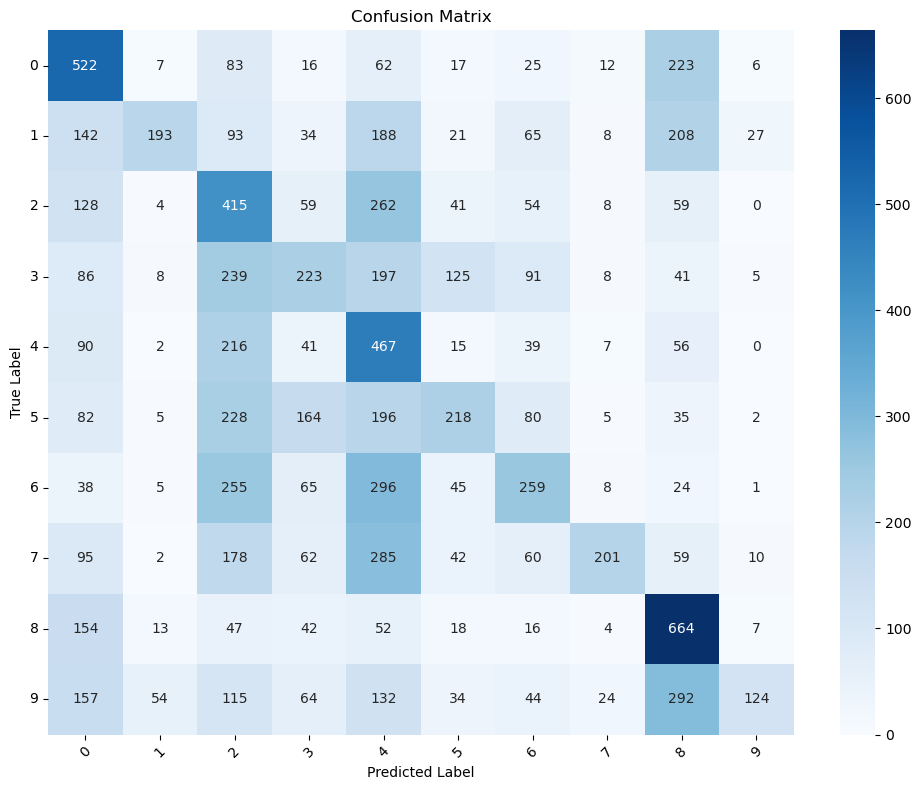

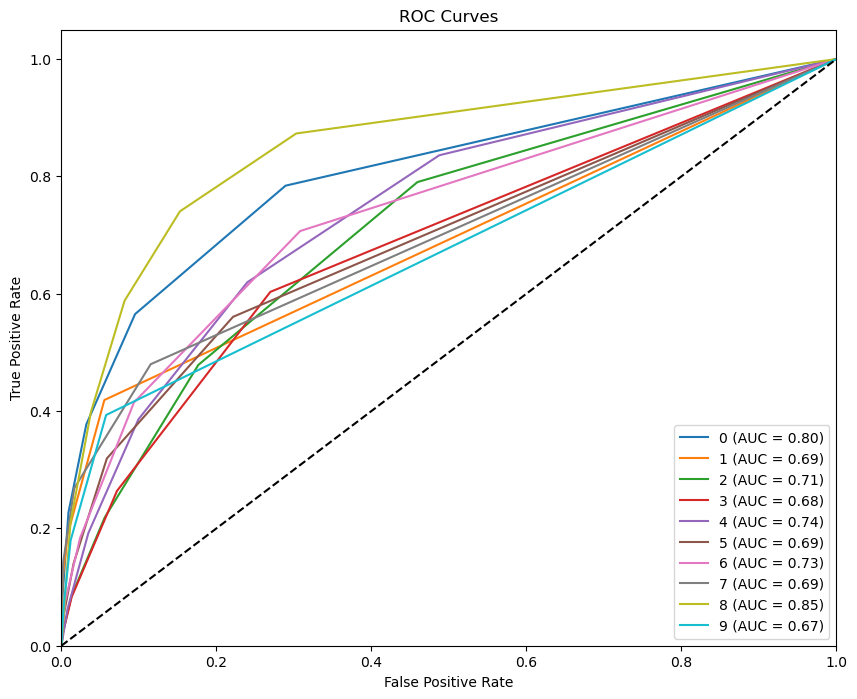


Reduced Data Metrics:


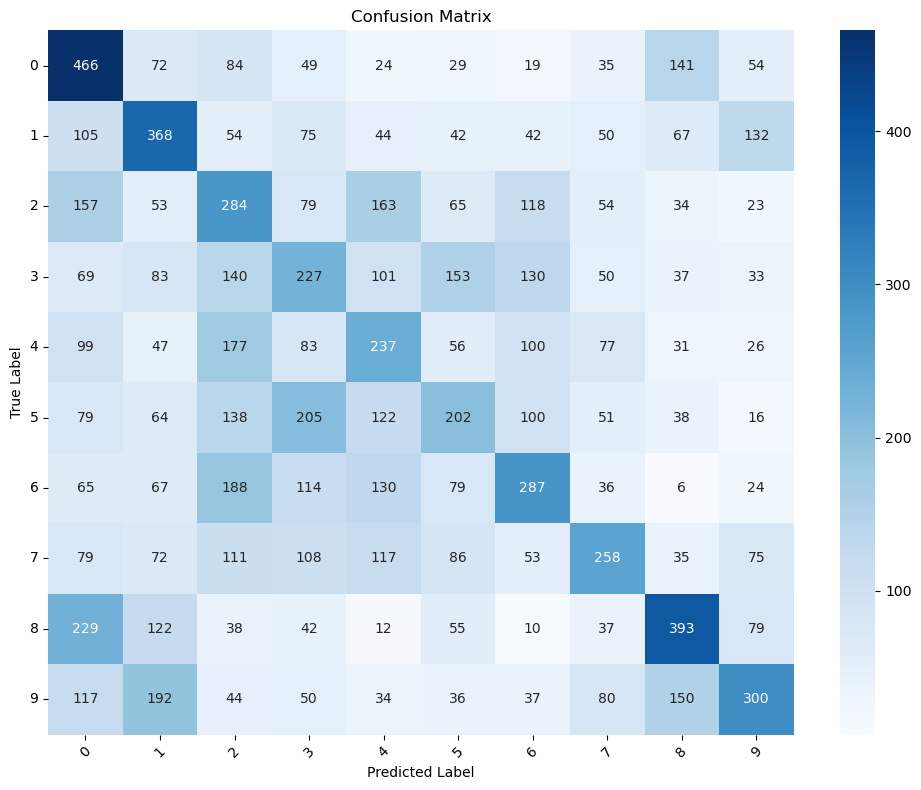

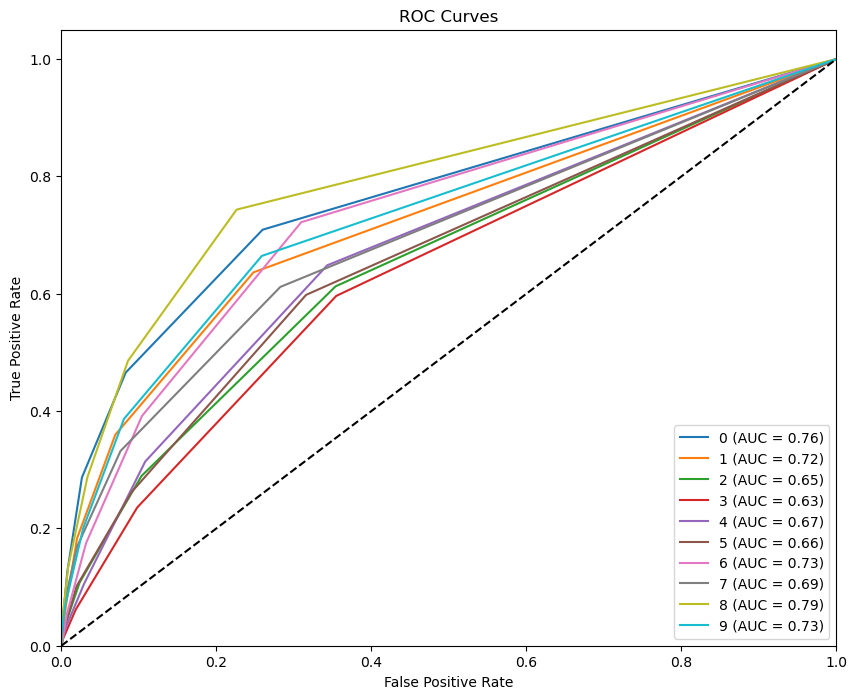


CIFAR-10 LDA Results Summary:

Original Data Metrics:
Accuracy: 0.4266
Precision: 0.4266
Recall: 0.3286
F1 Score: 0.3146

LDA-Reduced Data Metrics:
Accuracy: 0.3073
Precision: 0.3073
Recall: 0.3022
F1 Score: 0.3006

Detailed Classification Report for CIFAR-10 LDA:
              precision    recall  f1-score     support
airplane       0.318089  0.478931  0.382281    973.0000
automobile     0.322807  0.375894  0.347334    979.0000
bird           0.225755  0.275728  0.248252   1030.0000
cat            0.219961  0.221896  0.220925   1023.0000
deer           0.240854  0.254019  0.247261    933.0000
dog            0.251557  0.199015  0.222222   1015.0000
frog           0.320312  0.288153  0.303383    996.0000
horse          0.354396  0.259557  0.299652    994.0000
ship           0.421674  0.386431  0.403284   1017.0000
truck          0.393701  0.288462  0.332963   1040.0000
accuracy       0.302200  0.302200  0.302200      0.3022
macro avg      0.306911  0.302809  0.300756  10000.0000
weight

In [13]:
# Compare KNN classification with LDA-reduced data
print("\nPerforming KNN classification on LDA results...")

# MNIST LDA Results
print("\nAnalyzing MNIST LDA Results...")
mnist_lda_results = knn_comparison(mnist_data, mnist_lda, mnist_labels)

print("\nMNIST LDA Results Summary:")
print("\nOriginal Data Metrics:")
print(f"Accuracy: {mnist_lda_results['original_metrics']['precision']:.4f}")
print(f"Precision: {mnist_lda_results['original_metrics']['precision']:.4f}")
print(f"Recall: {mnist_lda_results['original_metrics']['recall']:.4f}")
print(f"F1 Score: {mnist_lda_results['original_metrics']['f1_score']:.4f}")

print("\nLDA-Reduced Data Metrics:")
print(f"Accuracy: {mnist_lda_results['reduced_metrics']['precision']:.4f}")
print(f"Precision: {mnist_lda_results['reduced_metrics']['precision']:.4f}")
print(f"Recall: {mnist_lda_results['reduced_metrics']['recall']:.4f}")
print(f"F1 Score: {mnist_lda_results['reduced_metrics']['f1_score']:.4f}")

# Print detailed MNIST class metrics
print("\nDetailed Classification Report for MNIST LDA:")
mnist_class_names = [str(i) for i in range(10)]
mnist_report_df = pd.DataFrame(mnist_lda_results['reduced_metrics']['class_report']).T
print(mnist_report_df)

# Fashion-MNIST LDA Results
print("\nAnalyzing Fashion-MNIST LDA Results...")
fashion_lda_results = knn_comparison(fashion_data, fashion_lda, fashion_labels)

print("\nFashion-MNIST LDA Results Summary:")
print("\nOriginal Data Metrics:")
print(f"Accuracy: {fashion_lda_results['original_metrics']['precision']:.4f}")
print(f"Precision: {fashion_lda_results['original_metrics']['precision']:.4f}")
print(f"Recall: {fashion_lda_results['original_metrics']['recall']:.4f}")
print(f"F1 Score: {fashion_lda_results['original_metrics']['f1_score']:.4f}")

print("\nLDA-Reduced Data Metrics:")
print(f"Accuracy: {fashion_lda_results['reduced_metrics']['precision']:.4f}")
print(f"Precision: {fashion_lda_results['reduced_metrics']['precision']:.4f}")
print(f"Recall: {fashion_lda_results['reduced_metrics']['recall']:.4f}")
print(f"F1 Score: {fashion_lda_results['reduced_metrics']['f1_score']:.4f}")

# Print detailed Fashion-MNIST class metrics
print("\nDetailed Classification Report for Fashion-MNIST LDA:")
fashion_class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                      'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
fashion_report_df = pd.DataFrame(fashion_lda_results['reduced_metrics']['class_report']).T
fashion_report_df.index = fashion_class_names + ['accuracy', 'macro avg', 'weighted avg']
print(fashion_report_df)

# CIFAR-10 LDA Results
print("\nAnalyzing CIFAR-10 LDA Results...")
cifar_lda_results = knn_comparison(cifar_data, cifar_lda, cifar_labels)

print("\nCIFAR-10 LDA Results Summary:")
print("\nOriginal Data Metrics:")
print(f"Accuracy: {cifar_lda_results['original_metrics']['precision']:.4f}")
print(f"Precision: {cifar_lda_results['original_metrics']['precision']:.4f}")
print(f"Recall: {cifar_lda_results['original_metrics']['recall']:.4f}")
print(f"F1 Score: {cifar_lda_results['original_metrics']['f1_score']:.4f}")

print("\nLDA-Reduced Data Metrics:")
print(f"Accuracy: {cifar_lda_results['reduced_metrics']['precision']:.4f}")
print(f"Precision: {cifar_lda_results['reduced_metrics']['precision']:.4f}")
print(f"Recall: {cifar_lda_results['reduced_metrics']['recall']:.4f}")
print(f"F1 Score: {cifar_lda_results['reduced_metrics']['f1_score']:.4f}")

# Print detailed CIFAR-10 class metrics
print("\nDetailed Classification Report for CIFAR-10 LDA:")
cifar_class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                     'dog', 'frog', 'horse', 'ship', 'truck']
cifar_report_df = pd.DataFrame(cifar_lda_results['reduced_metrics']['class_report']).T
cifar_report_df.index = cifar_class_names + ['accuracy', 'macro avg', 'weighted avg']
print(cifar_report_df)

# The confusion matrices and ROC curves will be automatically plotted by the function